### K-means classifier with sklearn

In [1]:
import sklearn.datasets as data
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
import sklearn.metrics as metrics


DEBUGGING = True
PLOTTING = False # Don't change unless carefully modified some fields
# define markers for up to 10 clusters
CLUSTER_MARKERS = [ 'bo', 'rv', 'c^', 'm<', 'y>', 'ks', 'bp', 'r*', 'cD', 'mP' ]

number of instances = 1000


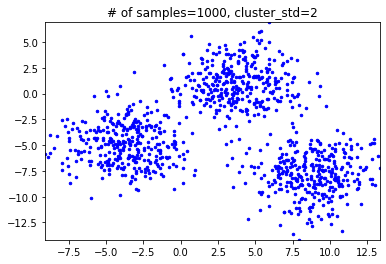

In [2]:
#-generate random data for clustering
STD=2
X, clusters = data.make_blobs( n_samples=1000, n_features=2, cluster_std=STD, random_state=12121 )
# set number of instances
M = len( X )
minX0 = np.min( X[:,0] )
maxX0 = np.max( X[:,0] )
minX1 = np.min( X[:,1] )
maxX1 = np.max( X[:,1] )

#-(optionally) print some info about the data set
if DEBUGGING:
    print( 'number of instances = %d' % ( M ))

# plot the above data with differenet std's
plt.figure()
plt.plot(X[:,0], X[:,1], 'b.', markersize=5)
plt.xlim((minX0,maxX0))
plt.ylim((minX1,maxX1))
plt.title('# of samples=1000, '+'cluster_std='+str(STD))
plt.plot()
# plt.savefig('myfig.png') # save figures for different std's
plt.show()

In [3]:
BC = np.zeros( 10 ) # between cluster
WC = np.zeros( 10 ) # within cluster
IN = np.zeros( 10 ) # inertia (within cluster)
SC = np.zeros( 10 ) # silhouette coefficient
CH = np.zeros( 10 ) # calinksi-harabaz

NUMBER OF CLUSTERS =  2
cluster centres:
c0 = [-0.08 -1.98]
c1 = [8.76 -7.57]
within-cluster score (km.inertia_) = 23144.24
K=2  WC=23144.2356  BC=109.5528  score=0.0047  inertia=23144.2356  silhouette=0.499582  calinski-harabaz=1070.4195



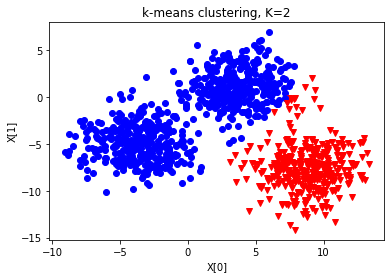

In [7]:
Kstart, Kend = 2, 3 #careful with the time when changing the Kend
for K in range( Kstart, Kend ): #replace later
    if DEBUGGING:
        print ('NUMBER OF CLUSTERS = ', K)
    km = cluster.KMeans( n_clusters=K )
    km.fit( X )
    if DEBUGGING:
        print ('cluster centres:')
        for k in range( K ):
            print ('c%0d = [%0.2f %0.2f]' % ( k, km.cluster_centers_[k][0], km.cluster_centers_[k][1] )),
            #print 'clusters:'
            #for j in range( M ):
            #    print '[%0.f %0.f] -> c%0d' % ( X[j][0], X[j][1], km.labels_[j] )
        print('within-cluster score (km.inertia_) = %0.2f' % ( km.inertia_ ))
        # record inertia score (within clusters, computed by scikit function)
        IN[K] = km.inertia_
        
    #-compute silhouette score
    SC[K] = metrics.silhouette_score( X, km.labels_, metric='euclidean' )
    
    #-compute calinski-harabaz score
    CH[K] = metrics.calinski_harabasz_score( X, km.labels_ )    
    
    #-tally members of each cluster
    members = [[] for i in range( K )] # lists of members of each cluster
    for j in range( M ): # loop through instances
        members[ km.labels_[j] ].append( j ) # add this instance to cluster returned by scikit function
    
    #-compute the within-cluster score
    within = np.zeros(( K ))
    for i in range( K ): # loop through all clusters
        within[i] = 0.0
        for j in members[i]: # loop through members of this cluster
            # tally the distance to this cluster centre from each of its members
            within[i] += ( np.square( X[j,0]-km.cluster_centers_[i][0] ) + np.square( X[j,1]-km.cluster_centers_[i][1] ))
    WC[K] = np.sum( within )
    
    #-compute the between-cluster score
    between = np.zeros(( K ))
    for i in range( K ): # loop through all clusters
        between[i] = 0.0
        for l in range( i+1, K ): # loop through remaining clusters
            # tally the distance from this cluster centre to the centres of the remaining clusters
            between[i] += ( np.square( km.cluster_centers_[i][0]-km.cluster_centers_[l][0] ) + np.square( km.cluster_centers_[i][1]-km.cluster_centers_[l][1] ))
    BC[K] = np.sum( between )
    
    #-compute overall clustering score
    score = BC[K] / WC[K]
    
    #-print results for this value of K
    print ('K=%d  WC=%.4f  BC=%.4f  score=%.4f  inertia=%.4f  silhouette=%f  calinski-harabaz=%.4f' % ( K, WC[K], BC[K], score, IN[K], SC[K], CH[K] ))
    print()  
    
    #-plot clusters for this value of K
    plt.figure()
    for j in range( M ):
        plt.plot( X[j][0], X[j][1], CLUSTER_MARKERS[km.labels_[j]] )
    plt.xlabel( 'X[0]' )
    plt.ylabel( 'X[1]' )
    plt.title( 'k-means clustering, K=' + str( K ))
    plt.savefig( 'km1-' + str( K ) + '.png' )
    plt.show()
    plt.close()

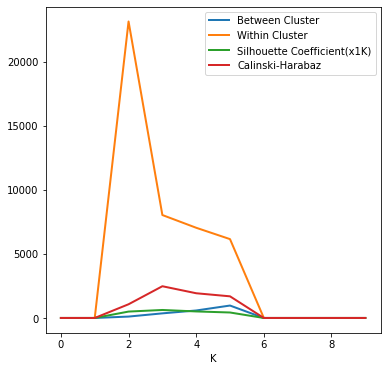

In [5]:
#-plot overall scores
plt.figure(figsize=(6,6))
plt.plot( BC, linewidth=2, label='Between Cluster' )
plt.plot( WC, linewidth=2, label='Within Cluster' )
plt.plot( SC*1000, linewidth=2, label='Silhouette Coefficient(x1K)' )
plt.plot( CH, linewidth=2, label='Calinski-Harabaz' )
plt.xlabel( 'K' )
plt.legend( loc='best' )
plt.show()